# Exploratory Data Analysis (EDA) - MovieLens 100K

This notebook performs basic EDA on the ML-100K dataset, displays plots, and saves them to `notebooks/eda_output`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src to path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data.loader import load_ratings_by_fold, load_movies_df
from src.utils.utils import load_users_df

# Ensure output dir
output_dir = os.path.join('..', 'notebooks', 'eda_output')
os.makedirs(output_dir, exist_ok=True)
print(f"Saving plots to: {output_dir}")

Saving plots to: ..\notebooks\eda_output


In [2]:
# Load Data
try:
    # data_dir relative to project root (where src is)
    # When running from notebooks/, module_path is project root
    ratings = load_ratings_by_fold(data_dir='ml-100k', fold_name='u.data')
    movies = load_movies_df(data_dir='ml-100k', file_name='u.item')
    users = load_users_df(data_dir='ml-100k', file_name='u.user') 
    
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully


## 1. Ratings Analysis

In [3]:
print("Ratings Shape:", ratings.shape)
ratings.head()

Ratings Shape: (100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


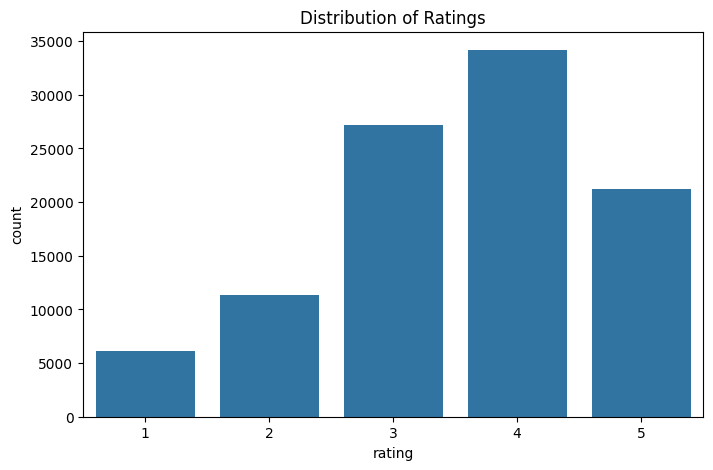

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.savefig(os.path.join(output_dir, 'ratings_dist.png'))
plt.show()

## 2. Users Analysis

In [5]:
print("Users Shape:", users.shape)
users.head()

Users Shape: (943, 5)


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


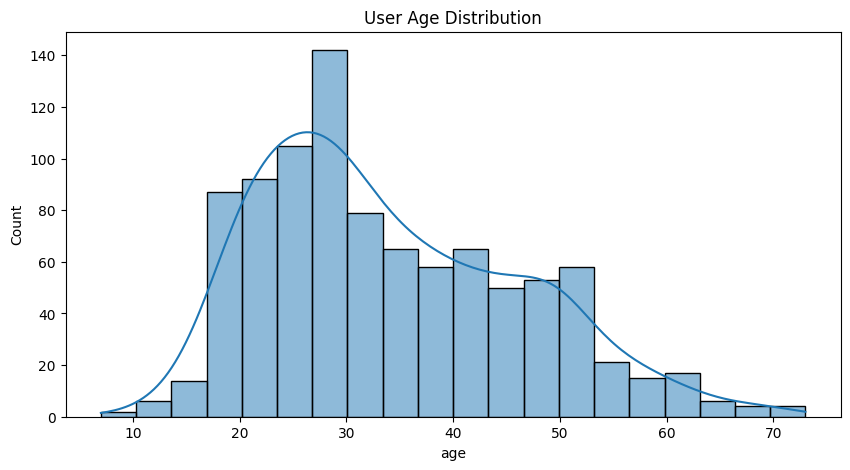

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(users['age'], bins=20, kde=True)
plt.title('User Age Distribution')
plt.savefig(os.path.join(output_dir, 'user_age_dist.png'))
plt.show()

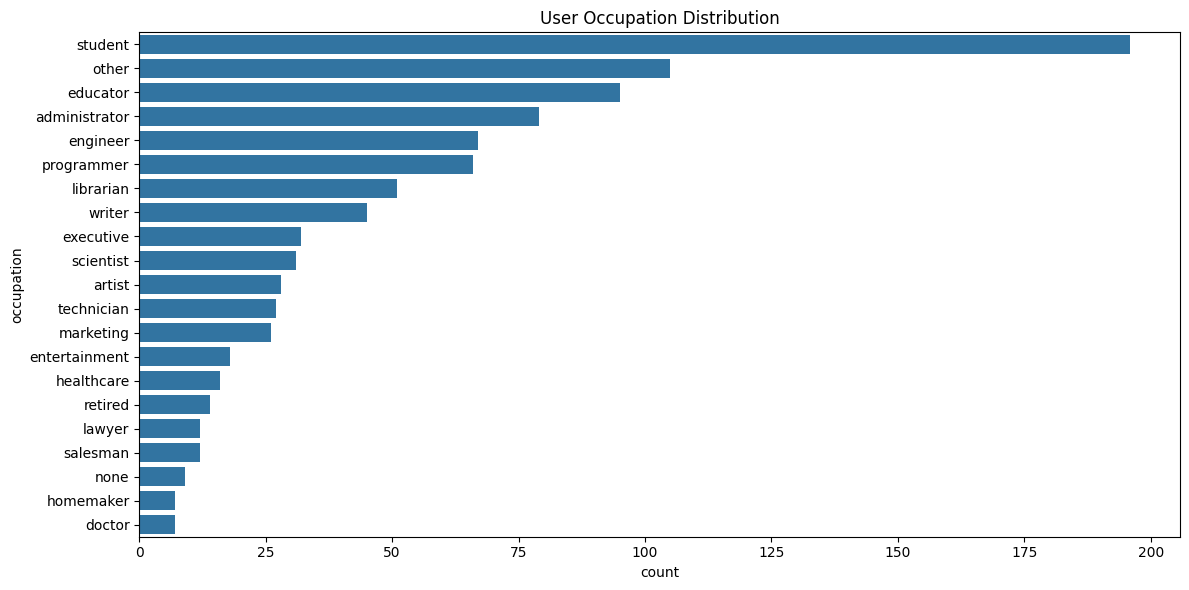

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', data=users, order=users['occupation'].value_counts().index)
plt.title('User Occupation Distribution')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'user_occupation_dist.png'))
plt.show()

## 3. Movies Analysis

In [8]:
print("Movies Shape:", movies.shape)
movies.head()

Movies Shape: (1682, 24)


,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 4. Sparsity

In [9]:
n_users = ratings['user_id'].nunique()
n_items = ratings['item_id'].nunique()
n_ratings = len(ratings)

sparsity = 1 - (n_ratings / (n_users * n_items))
print(f"Number of Users: {n_users}")
print(f"Number of Items: {n_items}")
print(f"Number of Ratings: {n_ratings}")
print(f"Sparsity: {sparsity:.4f}")

Number of Users: 943
Number of Items: 1682
Number of Ratings: 100000
Sparsity: 0.9370
